## 1. Converting Text Data to Lowercase <br>
lower()

In [2]:
import pandas as pd


In [14]:
text=['This is introduction to NLP','It is likely to be useful, to people ','Machine learning is the new electrcity','There would be less hype around AI and more action going forward','python is the best tool!','R is good langauage','I like this book','I want more books like this']

df = pd.DataFrame({'tweet': text})
df

,tweet
0,This is introduction to NLP
1,"It is likely to be useful, to people"
2,Machine learning is the new electrcity
3,There would be less hype around AI and more ac...
4,python is the best tool!
5,R is good langauage
6,I like this book
7,I want more books like this


In [15]:
# Example:

x = 'Testing This'
x2 = x.lower()
print(x2)

testing this


In [16]:
df['tweet'] = df['tweet'].apply( lambda x: " ".join(x.lower() for x in x.split() ))
df['tweet']

0                          this is introduction to nlp
1                 it is likely to be useful, to people
2               machine learning is the new electrcity
3    there would be less hype around ai and more ac...
4                             python is the best tool!
5                                  r is good langauage
6                                     i like this book
7                          i want more books like this
Name: tweet, dtype: object

## 2. Removing Punctuation <br>
This helps to reduce the size of the data and increase computational efficiency.<br>
replace()

In [19]:
import re

s = "I. like. this book!"
s1 = re.sub(r'[^\w\s]','', s)
print(s1)


I like this book


In [20]:
import string

for c in string.punctuation:
    s = s.replace(c,'')
s    


'I like this book'

In [21]:
df['tweet'] = df['tweet'].str.replace('[^\w\s]','')
df['tweet']

0                          this is introduction to nlp
1                  it is likely to be useful to people
2               machine learning is the new electrcity
3    there would be less hype around ai and more ac...
4                              python is the best tool
5                                  r is good langauage
6                                     i like this book
7                          i want more books like this
Name: tweet, dtype: object

## 3. Removing stop words<br>
stop words are very common words that carry on meaning or less meaning compare to keywords.<br>

example: How to develop chatbot using python ? <br>
How and to are stop words and develop,chatbot and python are keywords.<br>
similarly, can remove more common words and rare words as well.<br>

using NLTK library.

In [25]:
!python ./nlp_process_data/remove_stop_words.py

[nltk_data] Downloading package stopwords to /home/harsha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
0                                This introduction NLP
1                             It likely useful, people
2                      Machine learning new electrcity
3    There would less hype around AI action going f...
4                                    python best tool!
5                                     R good langauage
6                                          I like book
7                                    I want books like
Name: tweet, dtype: object


## 4.Standardizing Text<br>
Most of the text data are in the customer reviews, blogs or tweets.so, high chance of using short words and abbreviations.<br>
Use dict.<br>

In [36]:
#create custom look dict
import re

lookup_dict = {'nlp':'natural language processing', 'ur':'your', "wbu" : "what about you"}

def text_std(input_text):
     words = input_text.split()
     new_words = []
     for word in words:
         word = re.sub(r'[^\w\s]',"",word)
         if word.lower() in lookup_dict:
             word = lookup_dict[word.lower()]
             new_words.append(word)
             new_text = " ".join(new_words)
     return new_text

print( text_std("I like nlp and it's ur choise, wbu"))


natural language processing your what about you


## 5. Correcting Spelling<br>
Using TextBlob Library<br>


In [37]:
from textblob import TextBlob

In [39]:
df

,tweet
0,this is introduction to nlp
1,it is likely to be useful to people
2,machine learning is the new electrcity
3,there would be less hype around ai and more ac...
4,python is the best tool
5,r is good langauage
6,i like this book
7,i want more books like this


In [40]:
df['tweet'].apply(lambda x: str(TextBlob(x).correct()))

0                          this is introduction to nap
1                  it is likely to be useful to people
2              machine learning is the new electricity
3    there would be less hope around ai and more ac...
4                              patron is the best tool
5                                   r is good language
6                                     i like this book
7                          i want more books like this
Name: tweet, dtype: object

In [41]:
from autocorrect import spell

print(spell(u'mussage'))
print(spell(u'sirvice'))

message
service


## 6. Tokenizing Text <br>
This referes to splitting text into minimal meaningful units.
using NLTK, Spacy and TextBlob

In [43]:
#Using textblob
from textblob import TextBlob

TextBlob(df['tweet'][3]).words

WordList(['there', 'would', 'be', 'less', 'hype', 'around', 'ai', 'and', 'more', 'action', 'going', 'forward'])

In [46]:
#using NLTK
import nltk

#create data
mystring = "My favorite animal is cat"

print( nltk.word_tokenize(mystring) )
print( mystring.split() )


['My', 'favorite', 'animal', 'is', 'cat']
['My', 'favorite', 'animal', 'is', 'cat']


## 7. stemming <br>
Process of extracting a root word.<br>
Example, fish, fishes and fishing are stemmed into fish <br>
Using NLTK or TextBlob Libray

In [47]:

text=['I like fishing','I eat fish','There are many fishes in pound']

df = pd.DataFrame({'tweet':text})
print(df)

                            tweet
0                  I like fishing
1                      I eat fish
2  There are many fishes in pound


In [52]:
from nltk.stem import PorterStemmer

st = PorterStemmer()

print( df['tweet'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()])) ) #stemmed to fish




0                     I like fish
1                      I eat fish
2    there are mani fish in pound
Name: tweet, dtype: object


## 8.Lemmatizing <br>
Process of extracting a root word by considering vocabulary. <br>
Example, good, better or best is lemmatizing into good. <br>

The stemmed form of leafs is leafs is leaf and leaves is leav. <br>
The lemmatized form of leafs is leaf and **leaves is leaf**. <br>

In [54]:

text = ['I like fishing','I eat fish','There are many fishes in pound', 'leaves and leaf']

df = pd.DataFrame({'tweet':text})

print(df)

                            tweet
0                  I like fishing
1                      I eat fish
2  There are many fishes in pound
3                 leaves and leaf


In [55]:
from textblob import Word

df['tweet'] = df['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df['tweet']

0                  I like fishing
1                      I eat fish
2    There are many fish in pound
3                   leaf and leaf
Name: tweet, dtype: object

## 9. Exploring Text Data<br>


In [56]:
import nltk

from nltk.corpus import webtext
nltk.download('webtext')
wt_sentences = webtext.sents('firefox.txt')
wt_words = webtext.words('firefox.txt')

from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string

print(len(wt_sentences))
print(len(wt_words))

[nltk_data] Downloading package webtext to /home/harsha/nltk_data...
[nltk_data]   Package webtext is already up-to-date!
1142
102457


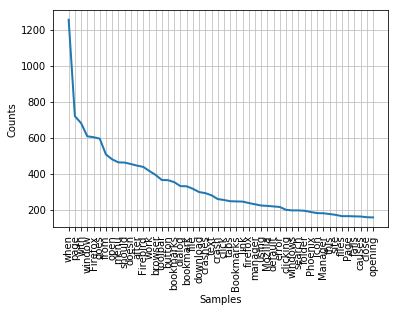

In [60]:
frequency_dist = nltk.FreqDist(wt_words)

sorted_frequency_dist =sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)
large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k)>3])
frequency_dist = nltk.FreqDist(large_words)
frequency_dist.plot(50,cumulative=False)

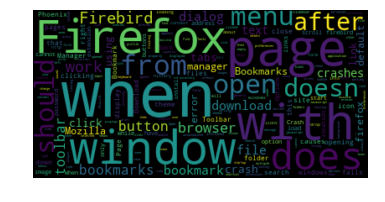

In [62]:
# build word cloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()

## 10. Building a Text Preprocessing pipeline<br>
end-to-end text preprocessing pipeline.


In [2]:
tweet_sample= "How to take control of your #debt https://personal.vanguard.com/us/insights/saving-investing/debt-management.#Best advice for #family #financial #success (@PrepareToWin)"

In [3]:
import re
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import Word
from nltk.util import ngrams
import re
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize

In [18]:
#following are the text processing steps


tweet = tweet_sample
# convert to lowercase
tweet.lower()
#removes unicode
tweet = re.sub(r'(\\u[0-9A-Fa-f]+)',r"", tweet)
tweet = re.sub(r'[^\x00-\x7f]',r"",tweet)
#convert any url to URL
tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
#convert any @username to "AT_USER"

tweet = re.sub('@[^\s]+', 'AT_USER', tweet) 
#remove additional white spaces
tweet = re.sub('[\s]+', ' ', tweet )
tweet = re.sub('[\n]+', ' ', tweet )
#remove not alphanumeric sysmbols white spaces
tweet = re.sub(r'[^\w]','', tweet)
#removes hashtag in front of a word """
tweet = re.sub(r'#( [^\s]+)', r'\1', tweet )
#replace #word with word
tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
# remove :( or :)
tweet = tweet.replace(':)',"")
tweet = tweet.replace(':(',"")
#remove numbers
tweet = " ".join([i for i in tweet if not i.isdigit()])
#remove multiple exclamation
tweet = re.sub(r"(\!)\1+", ' ', tweet)
#remove multiple question marks
tweet = re.sub(r"(\?)\1+", ' ', tweet)
#remove multistop
tweet = re.sub(r"(\.)\1+", ' ', tweet)
#lemma
from textblob import Word

tweet =" ".join([Word(word).lemmatize() for word in tweet.split()] )

# OR stemmer
#st = PorterStemmer()
#tweet=" ".join([st.stem(word) for word in tweet.split()])
#Removes emoticons from text

tweet = re.sub(':\)|;\)|:-\)|\(-:|:-D|=D|:P|xD|X-p|\^\^|:-*|\^\.\^|\^\-\^|\^\_\^|\,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*|:O|=O|=\-O|O\.o|XO|O\_O|:-\@|=/|:/|X\-\(|>\.<|>=\(|D:', "", tweet)
               
#trim
tweet = tweet.strip('\'"')
row = tweet

print(row)

    
                
                
    

H o w t o t a k e c o n t r o l o f y o u r d e b t U R L a d v i c e f o r f a m i l y f i n a n c i a l s u c c e s s A T _ U S E R
